In [91]:
import pandas as pd

import matplotlib.pyplot as plt
#import plotly.plotly as py
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame, Panel
from collections import Counter
from operator import truediv

In [92]:
trainwithtime = pd.read_csv(
    'procestrainwithoutnoise.csv', 
    parse_dates=['impressionTimestamp', 'clickTimestamp'])

In [93]:
train = trainwithtime.fillna(0)
train.columns

Index(['Unnamed: 0', 'frontPageViewId', 'contentPosition',
       'impressionTimestamp', 'contentId', 'clickedPageViewId',
       'clickTimestamp', 'IsClicked'],
      dtype='object')

### POSITION PER ARTICLE WITH TIME

In [94]:
train['time_hour'] = train.impressionTimestamp.apply(lambda x: x.hour)

In [95]:
train.to_csv("processdatawithhour.csv")

In [96]:
train[train["frontPageViewId"] == "00001212-9021-41c4-8280-95712083b45b"]

,Unnamed: 0,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,time_hour
9,9,00001212-9021-41c4-8280-95712083b45b,0,2017-06-01 20:56:59,MyKpE,0,1970-01-01,0,20


### FIND THE CLICKED MAX POSITION DISTRIBUTIOIN FOR EACH FRONTPAGE

In [97]:
trainwithoutmissing = train[train["frontPageViewId"] != 0]

In [98]:
idx = trainwithoutmissing.groupby(["frontPageViewId"])["contentPosition"].transform(max) == trainwithoutmissing["contentPosition"]

In [99]:
trainmaxposition = trainwithoutmissing[idx]


In [100]:
a = Counter(list(trainmaxposition[trainmaxposition["IsClicked"] == 1]["contentPosition"].values.tolist()))

In [101]:
y=[]
for item in a.keys():
    y.append("max_position"+str(item))

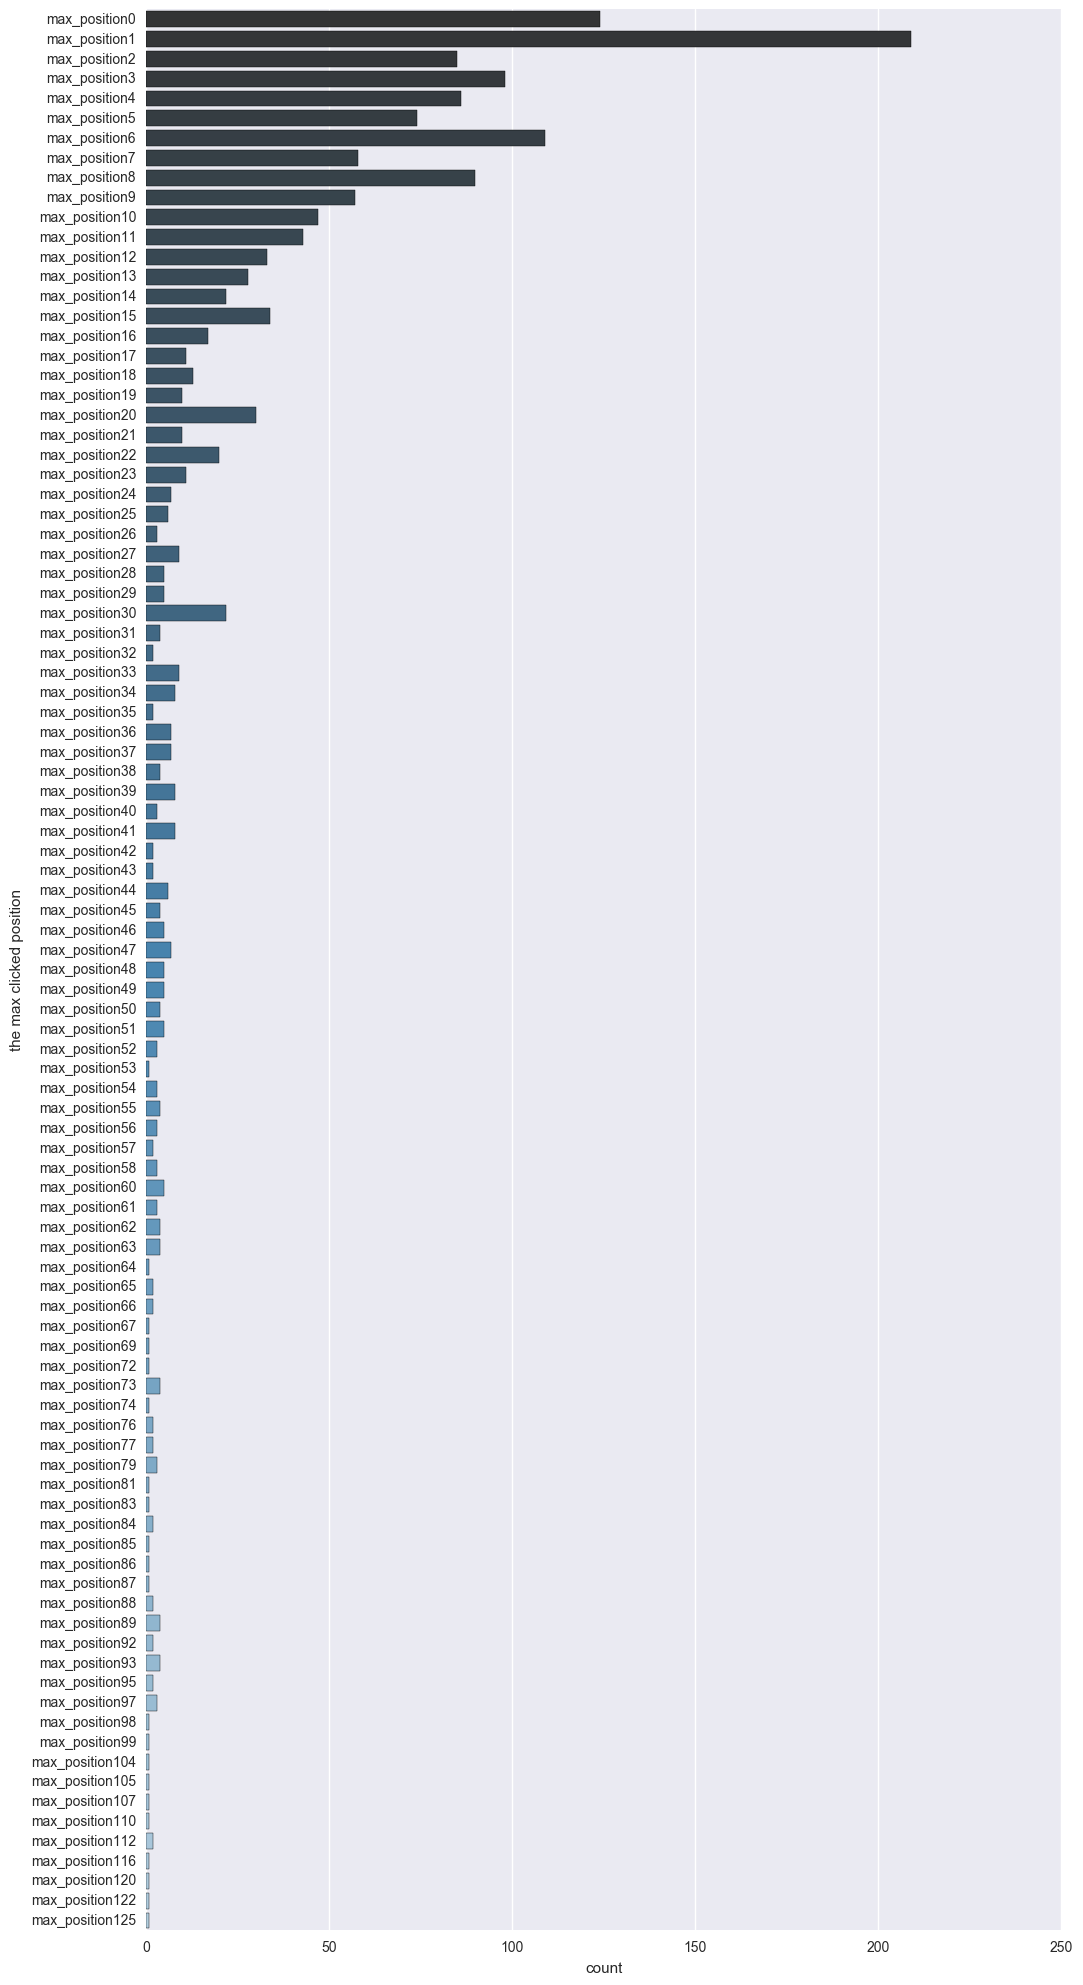

In [102]:
feature_df = pd.DataFrame()
feature_df["Features"] = y
feature_df["scores"] = list(a.values())
fig, ax = plt.subplots()
fig.set_size_inches(11, 20)
sns.barplot(y="Features", x="scores", data = feature_df,palette="Blues_d", ax=ax)
plt.ylabel("the max clicked position")
plt.xlabel("count")
plt.tight_layout()
#plt.savefig("max clicked position per frontpage.png")
plt.show()

### WHETHER A USER IS STOPED WHEN THEY ARE SATISFIED WITH THE LAST ARTICLE THEY CLICKED

In [103]:
traincliked = trainwithoutmissing[trainwithoutmissing["IsClicked"] == 1]
#clickedposition = traincliked.grou

In [104]:
clickedposition = list(traincliked.groupby(["contentPosition"])["IsClicked"].count())

In [105]:
#probability = list(a.values())/clickedposition
probability = list(map(truediv, list(a.values()), clickedposition))

In [106]:
pd.DataFrame({"probability of the clicked last position":probability}).describe()

,probability of the clicked last position
count,97.000000
mean,0.228321
std,0.126291
min,0.058824
25%,0.142857
50%,0.200000
75%,0.285714
max,0.800000


###### It means that when people clicked one article, it will have r probability for reader to examine the next article or have i probability to click the next article, and have (1-j-i) probability to exit the frontpage.

In [ ]:
#gammas = sns.load_dataset("gammas")
#ax = sns.tsplot(time="timepoint", value="BOLD signal",
                 #unit="subject", condition="ROI",
                 #data=gammas)

In [ ]:
#gammas.head()

### NEW DATA WITH ENIVERONMENT AND ENGAGEMENT 

In [4]:
clicked_impressions_df = pd.read_csv(
    '20170602_joined_impressions.csv.gz', sep=',', compression='gzip',
    names=['experiment', 'variant', 'userId', 'environmentId', 'frontPageViewId', 'contentPosition',
           'impressionTimestamp', 'contentId', 'clickedPageViewId', 'clickTimestamp', 'IsClicked',
           'contentPageViewId', 'maxSecondsSincePageView', 'maxDuration', 'maxScrollPosition', 'contentWordCount'],
    usecols=['environmentId', 'frontPageViewId', 'contentPosition',
           'impressionTimestamp', 'contentId', 'clickedPageViewId', 'clickTimestamp', 'IsClicked',
           'contentPageViewId', 'maxSecondsSincePageView', 'maxDuration', 'maxScrollPosition', 'contentWordCount'],
    parse_dates=['impressionTimestamp', 'clickTimestamp'])

In [5]:
#def removenoise(train):
newtrain = clicked_impressions_df.fillna(0)

In [6]:
newtrain = newtrain[newtrain["frontPageViewId"] !=0]

### MAX SCOLLPOSITION MAX READING TIME

In [7]:
clickedcontent = newtrain[newtrain["IsClicked"] == 1]

In [8]:
clickedcontent[:100]

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,maxDuration,maxScrollPosition,contentWordCount
165,7cda3ca8-4c62-4af0-85aa-5f3cd1af2557,0000e7a6-5cb4-4781-a56e-ffe2c72b1e33,3.0,2017-06-02 11:58:37,b0A5v,58c447ee-410e-4614-b8e6-f141f560abf5,2017-06-02 11:58:46,1.0,58c447ee-410e-4614-b8e6-f141f560abf5,250.0,200000.0,4284.0,815.0
169,6cd04e50-d67f-4de6-9bb5-c129cb89af31,00016f8e-558b-4659-82f2-a9db75d05ea9,14.0,2017-06-02 18:16:12,Wppak,cc242a98-5555-4f6b-b228-79c1e1bf0e64,2017-06-02 18:16:28,1.0,0,0.0,0.0,0.0,0.0
177,b8c0f90b-6162-48cc-b1fb-efde730dbe86,000191d1-4a15-4ce4-be00-251c90243165,8.0,2017-06-02 11:16:00,kn5PQ,418e1c67-db7c-41ea-9a1c-cf97c65dd88c,2017-06-02 11:16:12,1.0,418e1c67-db7c-41ea-9a1c-cf97c65dd88c,110.0,69000.0,5884.0,830.0
278,972d4518-b127-45b5-a81b-5b56654b2bf3,0001c098-2539-402f-8d6b-baa500eb48c3,1.0,2017-06-02 06:54:22,78r94,9d276ff2-4b60-4763-be1e-dea57d959d5c,2017-06-02 06:54:38,1.0,9d276ff2-4b60-4763-be1e-dea57d959d5c,35.0,34000.0,4481.0,830.0
369,1ca3873b-7067-425a-ac1a-477989931a21,00021179-0e1f-437a-97d5-284a0ba25b48,25.0,2017-06-02 18:12:45,OxvGO,e5409149-7ecc-452f-8dac-26365e5e7060,2017-06-02 18:12:52,1.0,e5409149-7ecc-452f-8dac-26365e5e7060,60.0,43000.0,3871.0,356.0
385,263c7c01-67a9-4181-b955-94b103996907,00027a10-9f1e-46e6-9ebb-d4bb44fea132,1.0,2017-06-02 19:13:03,6OL3e,97aca567-25f5-471a-8c34-06b740c6b5af,2017-06-02 19:13:20,1.0,97aca567-25f5-471a-8c34-06b740c6b5af,50.0,45000.0,2900.0,331.0
498,c53872ec-ab9f-41dc-9f6f-fc922dbeea9b,000323b0-e5a3-4952-b2bf-9235efb03b5b,20.0,2017-06-02 16:19:35,yAAMA,62701c2c-523c-471a-836c-253724f4cfeb,2017-06-02 16:19:51,1.0,62701c2c-523c-471a-836c-253724f4cfeb,350.0,177000.0,7556.0,1572.0
513,08e41755-ebb1-4970-a22f-d29bd9d613ba,00042775-27c9-4b01-8b43-f96416be4413,28.0,2017-06-02 11:58:38,az694,786f6ea6-e393-46eb-a5df-a92f66530cc0,2017-06-02 11:58:48,1.0,786f6ea6-e393-46eb-a5df-a92f66530cc0,34.0,35000.0,1959.0,195.0
596,52b58969-584e-437a-8b26-a4d01dd64ba1,0004dbdf-aa5e-4bd5-af81-a66a65c0635c,7.0,2017-06-02 08:08:19,vRqxV,73c52c48-4545-40e6-b060-5fb2cd6e516a,2017-06-02 08:08:25,1.0,73c52c48-4545-40e6-b060-5fb2cd6e516a,55.0,52000.0,2519.0,187.0
616,69d05b5f-82d6-4e84-8fa4-94b7699a58d3,0004ed66-6bc1-4a11-b8c1-b9443dac1c7b,23.0,2017-06-02 04:46:43,4p2WR,c29acdb4-4d2a-446a-8137-b9ccb9890190,2017-06-02 04:46:56,1.0,c29acdb4-4d2a-446a-8137-b9ccb9890190,452.0,160000.0,7713.0,2092.0


In [9]:
clickedcontent.groupby('environmentId').aggregate({'contentId':len}).sort(columns = 'contentId')

/Users/XiHUANG/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,contentId
environmentId,
fffff161-adc7-471a-af00-7386f76e60b4,1
cc3cabba-14b5-4a0a-872e-df8e7cf3ad72,1
72f1844f-95fb-478c-b190-005b0fb38aaf,1
72f19e2f-76ea-4808-8527-591de3372347,1
cc3c866e-5149-4dd6-a88e-efd4b524c0a5,1
72f2089c-1f91-402f-832d-7f8136c616f1,1
72f28513-bb34-42d4-b06c-c9464746f94b,1
72f2c096-1553-4e6f-b3f3-c4ce47f888a8,1
72f2ca7c-768d-4232-b770-ff77602ed284,1


In [10]:
clickedcontent.groupby(['environmentId'])["maxSecondsSincePageView"].nunique()

environmentId
000003c8-4396-4019-9c49-4cfb8dc0a827    11
000089e5-fcb9-48e4-a198-f81352d6676f     7
00018025-ee5f-403e-babf-e314481eabba     1
0002689c-0885-4e3c-89ef-5447ebb7fb59     1
00036e72-f531-4cb6-bef5-a03b17e3b4de     3
000413db-7271-49ca-bd0b-86761f345107     2
00045c72-ed0a-4dbc-bd4f-b1021963278c     1
00049acb-8ad9-4914-8905-e4fda40da2a3     1
00049ca2-f05a-4909-b6b8-bbf1a2476364     1
00052294-0305-41cb-be2b-53f04d3ebe8d     1
0005d828-5454-4c22-94e1-7e4c94e872ee     2
0006a9b2-fe08-428e-bde5-99d6648ad6ea     1
0007260d-9887-485e-b3bb-84d9d11418b2     1
0007d55e-d5d4-4ead-a81a-daa1ac2397d6     1
0009a894-6b40-4653-9689-9809fe8b6a40     1
0009ff82-155b-47de-b3f7-72a144db1c39     1
000a4bae-6650-4ed8-8ffd-86748deedc88     1
000a67fb-ebd7-47c1-9924-2345c6983ac3     8
000a82fa-7882-4e53-9591-7d18db0e624b     1
000b77ee-dbfe-400d-a299-e6619d48320f     1
000d1a23-2ae7-4654-8f4d-0878b5fca19f     2
000ea278-a5ed-42c4-a34a-3769030f6b27     1
000ec093-f372-44ca-994a-bfe4a28d6d76    

In [11]:
clickedcontent[clickedcontent["contentId"] == "Wppak"]

,environmentId,frontPageViewId,contentPosition,impressionTimestamp,contentId,clickedPageViewId,clickTimestamp,IsClicked,contentPageViewId,maxSecondsSincePageView,maxDuration,maxScrollPosition,contentWordCount
169,6cd04e50-d67f-4de6-9bb5-c129cb89af31,00016f8e-558b-4659-82f2-a9db75d05ea9,14.0,2017-06-02 18:16:12,Wppak,cc242a98-5555-4f6b-b228-79c1e1bf0e64,2017-06-02 18:16:28,1.0,0,0.0,0.0,0.000000,0.0
3080,1a5e349e-4ece-48ee-9f45-3f64f32596b6,0022addc-5ffd-4b50-bad6-c39c7e4a24ce,4.0,2017-06-02 15:25:06,Wppak,29277184-8d90-4b2b-b405-72e4bdc7afd2,2017-06-02 15:25:24,1.0,29277184-8d90-4b2b-b405-72e4bdc7afd2,55.0,54000.0,5915.000000,2103.0
4211,37766742-4f50-43e9-8aa9-5d76ed337783,002d528b-d161-4949-a418-024b2d1c4e4d,4.0,2017-06-02 15:17:03,Wppak,d1837c9b-57a4-46f9-9e23-9db95f8b43f4,2017-06-02 15:17:08,1.0,d1837c9b-57a4-46f9-9e23-9db95f8b43f4,255.0,210000.0,8605.000000,2021.0
9801,999bae6f-1da1-4cd0-895b-a79cd16ee207,00662267-f2d1-42d0-a27b-b26afa5c67f3,12.0,2017-06-02 16:30:01,Wppak,9c8f9e92-760f-4675-ae67-08b17112c7cb,2017-06-02 16:30:12,1.0,9c8f9e92-760f-4675-ae67-08b17112c7cb,2409.0,94000.0,4282.000000,2103.0
13785,46317e15-1ebf-45f5-90bd-cdce64da1ffd,008fa756-7159-4192-9d60-8e22eed45483,11.0,2017-06-02 16:01:20,Wppak,582adb56-9480-4371-8c52-2946918486ef,2017-06-02 16:01:34,1.0,582adb56-9480-4371-8c52-2946918486ef,275.0,218000.0,9562.000000,2103.0
14360,276d5785-7fb7-4470-b70a-b9b8edd5d056,00963965-fa21-4333-9380-543ebe4d0b8d,13.0,2017-06-02 19:25:24,Wppak,f25c1e7b-e250-4579-a046-72db8cbf7477,2017-06-02 19:25:38,1.0,0,0.0,0.0,0.000000,0.0
16712,1e8ccffd-21fd-44ea-9de1-c8e215c8a5cb,00ad7e8d-9038-448a-b3b6-a87acb85a7a9,14.0,2017-06-02 16:20:13,Wppak,9e463c57-1892-4713-8df4-fa2d0157e170,2017-06-02 16:20:20,1.0,9e463c57-1892-4713-8df4-fa2d0157e170,171.0,65000.0,2441.000000,2021.0
21725,204a13e3-0bb2-49a7-b5f0-eedb9587b092,00e212c2-65e6-47d6-be46-e575861cb35b,17.0,2017-06-02 22:55:55,Wppak,ff027ec0-249d-415f-b338-8eeed5ebbba7,2017-06-02 22:56:00,1.0,ff027ec0-249d-415f-b338-8eeed5ebbba7,125.0,104000.0,8475.000000,2103.0
21748,181fa109-3fdf-40ba-aa1f-5bc37ac7869d,00e279fd-7a6d-44f2-bb58-458694993b24,4.0,2017-06-02 15:00:01,Wppak,903100ac-2a2c-4cca-bc41-db9a8ca88a37,2017-06-02 15:00:10,1.0,903100ac-2a2c-4cca-bc41-db9a8ca88a37,200.0,143000.0,8475.000000,2103.0
22007,1e049dda-2e48-4cbe-a05b-181744f2635b,00e4ccc9-2189-4105-9821-f89be8a26ccc,4.0,2017-06-02 15:08:23,Wppak,01bfbe0f-87b7-49e3-bf38-973dfb34ca86,2017-06-02 15:08:38,1.0,01bfbe0f-87b7-49e3-bf38-973dfb34ca86,125.0,111000.0,9053.000000,2021.0


In [12]:

try3 = clickedcontent[clickedcontent["contentId"] == "b0A5v"]
Counter(list(try3["contentWordCount"].values))

Counter({0.0: 272,
         763.0: 1355,
         764.0: 50,
         773.0: 1116,
         774.0: 69,
         815.0: 1406,
         889.0: 18,
         899.0: 11,
         941.0: 15,
         1318.0: 1})

In [13]:
maxscoll = clickedcontent.groupby(["contentPageViewId"])["maxScrollPosition"].mean()

In [14]:
maxscoll.describe()

count    133667.000000
mean       4595.290849
std        3575.023230
min           0.000000
25%        2240.000000
50%        3800.000000
75%        5955.000000
max       47883.000000
Name: maxScrollPosition, dtype: float64

In [15]:
maxreading = clickedcontent.groupby(["contentPageViewId"])["maxDuration"].mean()

In [16]:
maxreading.describe()

count    1.336670e+05
mean     7.260879e+04
std      8.062910e+04
min      0.000000e+00
25%      2.700000e+04
50%      5.100000e+04
75%      9.000000e+04
max      4.439000e+06
Name: maxDuration, dtype: float64

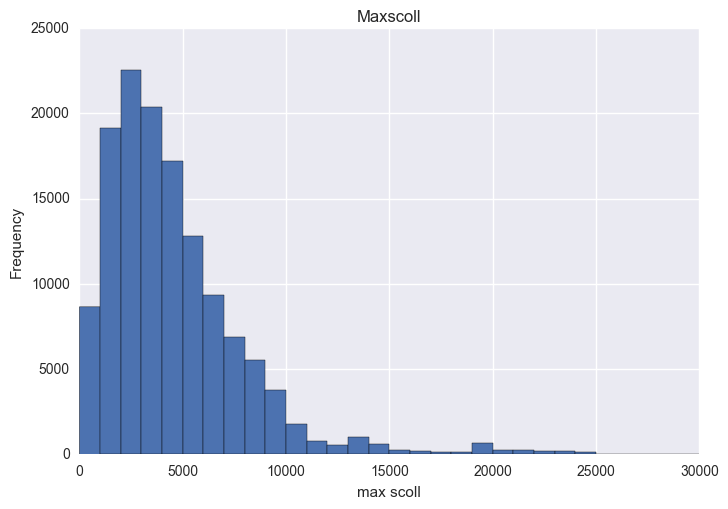

In [17]:
 
plt.hist(list(maxscoll),  bins=np.arange(min(list(maxscoll)), max(list(maxscoll)) + 1000, 1000))
plt.title("Maxscoll")
plt.xlabel("max scoll")
plt.ylabel("Frequency")
plt.xlim(0,30000)

plt.show()


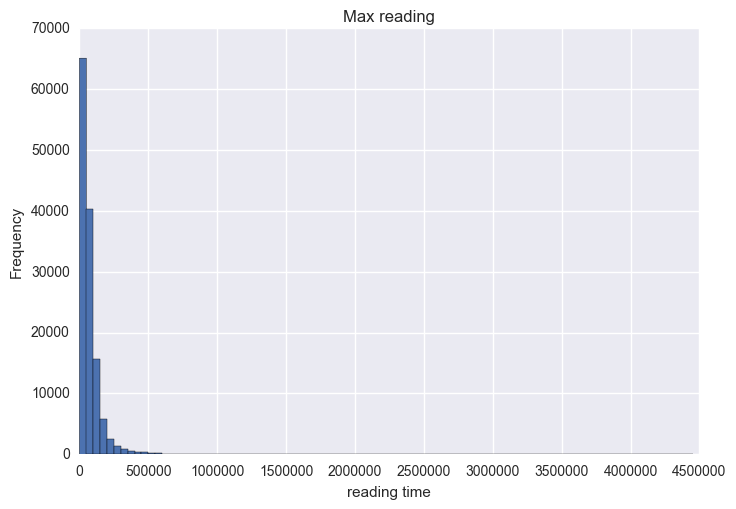

In [18]:
plt.hist(maxreading, bins=np.arange(min(list(maxreading)), max(list(maxreading)) + 50000, 50000))
plt.title("Max reading")
plt.xlabel("reading time")
plt.ylabel("Frequency")

plt.show()

In [119]:
bins = np.arange(min(list(maxreading)), max(list(maxreading)) + 20000, 20000)
bins = np.logspace(start=3, stop=6, num=20)
bins

array([    1000.        ,     1438.44988829,     2069.13808111,
           2976.35144163,     4281.33239872,     6158.48211066,
           8858.6679041 ,    12742.74985703,    18329.80710832,
          26366.5089873 ,    37926.90190732,    54555.94781169,
          78475.99703515,   112883.78916847,   162377.67391887,
         233572.14690901,   335981.82862838,   483293.02385718,
         695192.79617756,  1000000.        ])

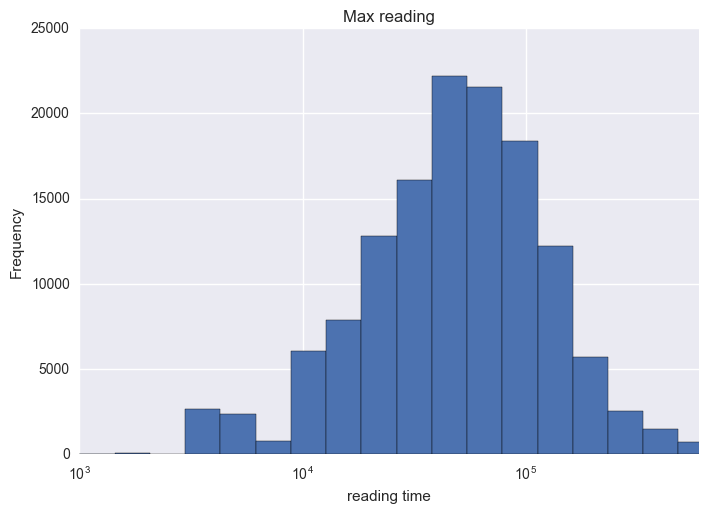

In [120]:
plt.hist(maxreading, bins=bins)
plt.title("Max reading")
plt.xlabel("reading time")
plt.ylabel("Frequency")
plt.xscale('log')
plt.xlim(0,600000)

plt.show()

### USER AND CONTENT

In [20]:
user_duration = clickedcontent.groupby(["environmentId"])["maxDuration"].mean()

In [23]:
data_egagement["maxDuration"].describe()

count    6.351755e+06
mean     1.530854e+03
std      1.568996e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.439000e+06
Name: maxDuration, dtype: float64

In [24]:
data_egagement = newtrain[['environmentId','frontPageViewId','contentPosition','impressionTimestamp','contentId','IsClicked','maxSecondsSincePageView','maxDuration','maxScrollPosition','contentWordCount']]

In [25]:
clickeddata = data_egagement[data_egagement["IsClicked"] == 1]
clickeddata.groupby(["environmentId","frontPageViewId","contentId"]).last().sort(columns = 'impressionTimestamp')

/Users/XiHUANG/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


contentPosition  \
environmentId                        frontPageViewId                      contentId                    
61da3533-437a-4f30-bf3c-4d4c41d91137 878ccd70-e311-46c7-a15f-25ec112130b0 yAAMA                 14.0   
f746b578-b371-4365-9279-6986e1b6a8a1 1c2b5e47-d838-480e-94e8-8c2c30a5bab7 kn71j                  0.0   
97ee1d8e-0cc1-4eab-813e-c0e54d874438 94b7d9f9-e4ce-45c8-8b89-060dfd5895bc BQpb9                  2.0   
a979fff8-c5fb-4fc4-8021-bc98c1c7dd30 b49f2630-1320-4e2e-a80c-0a02795b0beb 78r44                 74.0   
e1ff0ec9-ba38-4d21-8c2c-95fc700ee1fa 1d4462d5-5587-4829-8607-a54515c84d4d kn71j                  0.0   
31754c02-2d38-43e4-acdd-9e3dd8832ead ffce53a4-d818-4f94-b5f1-d9d4490cfba9 kn71j                  0.0   
                                                                          JmzMR                  2.0   
da9029fa-5409-40a5-a7e2-8fb186d3c14f 46162e29-d7d4-42ce-99fb-4afbba6ff3a0 wlWOA                 54.0   
31754c02-2d38-43e4-acdd-9e3dd8832ead ffce53a4-d818-4f94-b5f1-d9d4490cfba9 AKOpn                  4.0   
c5cb86a7-ef6b-4176-8f6f-99b9bdd8c4c1 e91139b2-d832-40d9-a835-09da3493529b 4p2WR                 14.0   
9ad85a4d-db0c-44ab-ba0e-62ead4dd015a 0e515622-897a-473c-8c05-f41b94e3f0ca lPG93                 24.0   
e41ead56-e23b-4743-9d32-6d8df5f215e5 970d37a5-8c75-46cf-b0c7-df9c2e1bc32a kn71j                  0.0   
a64c71fb-5ef8-4823-a34c-a7ee20a7c021 67d826ef-1316-442a-90ec-c396f254f26b MyKpE                  1.0   
2201c34d-c52b-40ec-85df-44b23deb0a6f 13533f31-4d17-4953-b14d-5c28eacffbcd RgLKr                  6.0   
7229fa95-e7dc-40b5-bccf-4302574f93d2 62970d86-382b-478d-9d11-e24b163ddfed RgLKr                  6.0   
c68319db-75d9-4994-87e5-4ab59621c6c8 3b4a5561-ae4f-429a-a389-0ca447295f9e JmzMR                  2.0   
c06be204-57cf-4b4c-afce-f0642afbda87 b2048a21-b788-433b-86f8-a3708248c3f8 AKOpn                  5.0   
d4a2f756-4d09-42a9-a59a-098eda8c9653 0d941036-640d-494f-b400-74327a9b7dc5 K57ao                 31.0   
5fc5e6cd-462d-4107-a31e-407eb899d350 025e571f-adf5-4d75-9fb8-4ba5891dc6e7 eQjnK                 53.0   
46e5000b-f693-4934-926b-fd9ae60b45d5 8ab2548a-e598-43f1-8adc-68abb936760d OxdE3                 11.0   
2efc8246-b2b2-4688-9cd6-61bdb8954f89 b1688324-bd1b-4d6c-87d4-d575ea8cfdcb RgLKr                  6.0   
16eff7d1-1d42-4860-a907-9241f8f29c7a b11b5f01-f011-4243-892e-e39685038430 BQ8w0                  1.0   
615a085c-966c-4ff6-935a-8e4ef216de7e d1226994-6b5a-486c-877e-dd18c5c339d5 kn71j                  0.0   
1756a45d-6e9a-4bb9-b652-110ab2d7ec1f 4da543a5-7ffe-4c3c-9a29-6dd410e731d5 MyKpE                  3.0   
113863da-3fee-44dc-a5aa-823be98b9ec0 db6c98c9-4a99-4485-876a-649351cf7a3b 4p2WR                 14.0   
6b1b5898-55ab-4fe4-894b-bc971651147b 3a5dd3c8-5d4d-42ed-b6e8-124b99c0739f vRqxV                 15.0   
bd8e07f2-e15b-4da1-8750-e9762d6ed0a9 b6355cdf-7d85-4d7e-b12c-d2e782cb8077 RgLKr                  6.0   
c0e7efd1-a2a3-439f-9d3d-80459161e938 88217b3c-25f6-48ca-bcd2-d5e1732378c1 VAA36                 20.0   
0915e430-7939-415c-b3b9-85f099ac952f a1523fbe-9bfc-4657-8d89-332ab4c9ea18 jW4Qb                 44.0   
d71f6177-e645-4b0a-9eb1-9f4b7adec068 01a48ca2-8916-4a8e-a8ab-6e20e2ecb893 JmzMR                  2.0   
...                                                                                              ...   
34c619dc-d2de-4a11-86f6-4f5e014730e4 f53c8444-5a5a-4973-b8ba-b12b91960bf3 py3A6                  0.0   
93ce6991-5f6b-483c-824c-8838fae8618b 62b5cef6-c3a5-4963-9f6f-a92de1501066 JmjJ8                 14.0   
5db740eb-bda0-40ef-8573-6f6c1afb3f5d c0ba4cba-1b08-4821-990c-18693f59b3f5 OKXpl                 11.0   
2e4065b6-044e-46ec-95d0-5b9799086dcf a865224c-48c1-4a1b-93f0-36f83b2ad362 97PB5                  1.0   
89cd69be-3995-49d5-9c3f-718f525858b3 e56f0a15-b5ba-46b2-8188-8b876db227de BQg09                  1.0   
b1d68f3f-3527-40b8-b8da-b1bd02e324e4 c9a750fd-ed48-4ecc-87a0-d8766bfb824d BQg09                  1.0   
8ca3f45e-10af-4319-8443-8fdd5

In [26]:
a = Counter(list(clickeddata.groupby("environmentId")["contentId"].nunique()))

In [27]:
sum(list(a.values()))

81029

In [28]:
probabilityoneclick = list(a.values())[0]/sum(list(a.values()))
probabilityoneclick

0.6377593207370201

##### Many users just see the one article for one frontpage a day.

In [29]:
idx = clickeddata.groupby("environmentId")["contentId"].nunique() == 1

In [30]:
userwithoneclick = list(clickeddata.groupby("environmentId")["contentId"].nunique()[idx].keys())

In [31]:
idx = clickeddata["environmentId"].isin(userwithoneclick)

In [32]:
datawithoneclick = clickeddata[idx ]

In [33]:
a = Counter(datawithoneclick.contentPosition.tolist())
position = []
for item in list(a.keys()):
    position.append("position"+str(item))

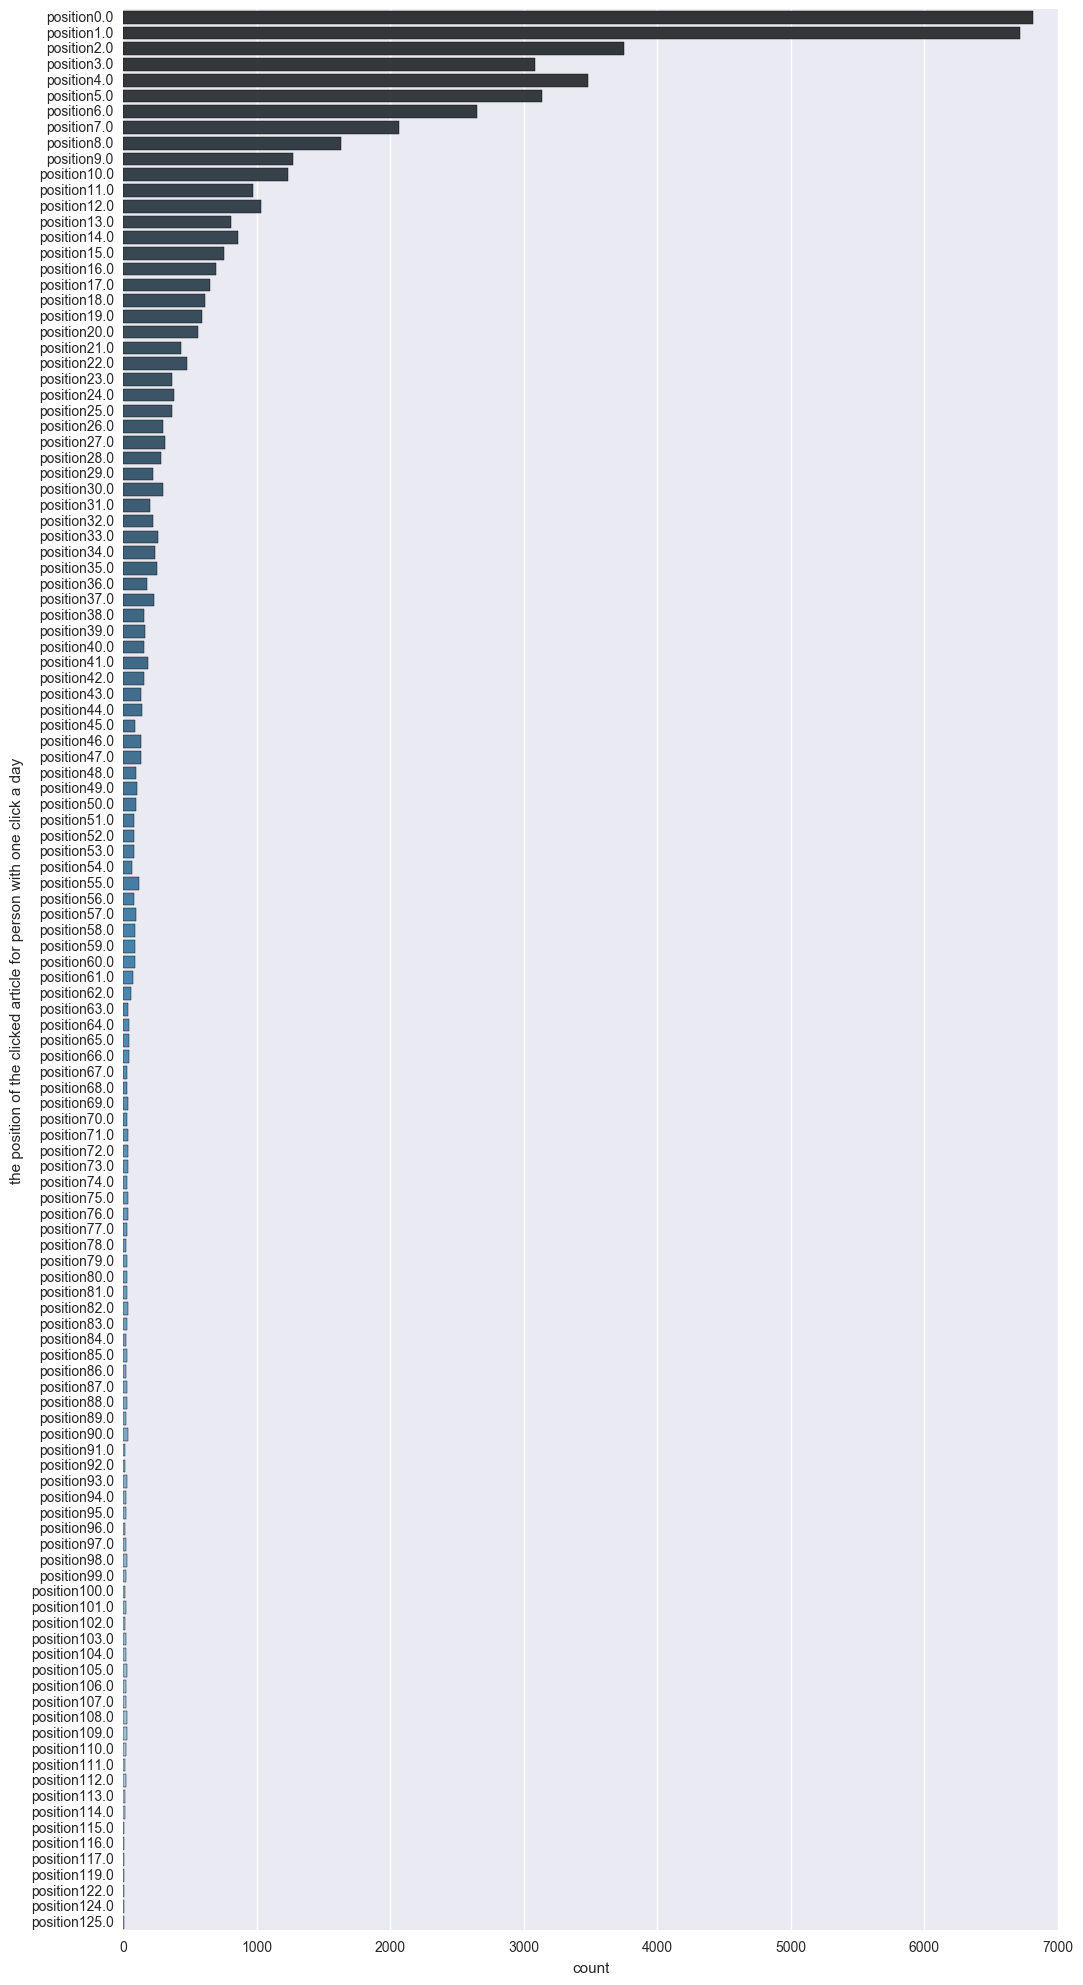

In [34]:
feature_df = pd.DataFrame()
feature_df["Features"] =  position
feature_df["scores"] = list(a.values())
fig, ax = plt.subplots()
fig.set_size_inches(11, 20)
sns.barplot(y="Features", x="scores", data = feature_df,palette="Blues_d", ax=ax)
plt.ylabel("the position of the clicked article for person with one click a day")
plt.xlabel("count")
plt.tight_layout()
#plt.savefig("max clicked position per frontpage.png")
plt.show()

##### User still look the article on the top of the frontpage

### Is user clicked one content fer page satisfied with the article on the top the frontpage/find the relationship between position and duration

In [55]:
ave_maxd = datawithoneclick.groupby("contentId")["maxDuration"].mean()
ave_p = datawithoneclick.groupby("contentId")["contentPosition"].mean()


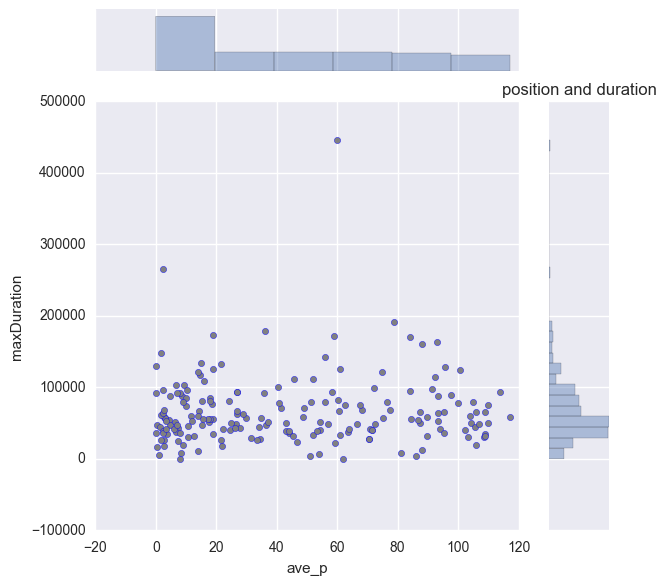

In [58]:
feature = pd.DataFrame({"maxDuration": list(ave_maxd),"ave_p": list(ave_p)})
g=sns.JointGrid(x='ave_p',y='maxDuration',data = feature,space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.5',edgecolor='b')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("position and duration")
#plt.xlabel("Average MaxDuration")
#plt.ylabel("Average Position")
#plt.savefig("hour_contentnumber.png")
plt.show()

### The relationship between duration and scoll position

In [61]:
ave_scrollposition = clickeddata.groupby("contentId")["maxScrollPosition"].mean()

In [63]:
maxduration =  clickeddata.groupby("contentId")["maxDuration"].mean()

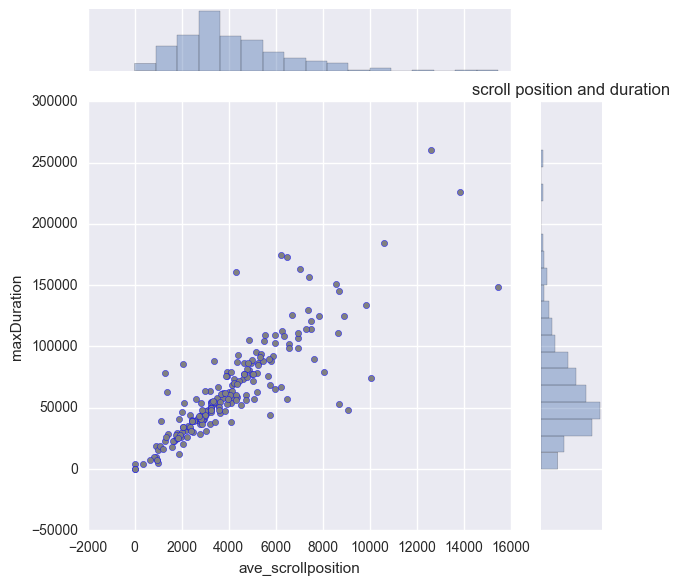

In [64]:
feature = pd.DataFrame({"maxDuration": list(maxduration),"ave_scrollposition": list(ave_scrollposition)})
g=sns.JointGrid(x='ave_scrollposition',y='maxDuration',data = feature,space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.5',edgecolor='b')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("scroll position and duration")
#plt.xlabel("Average MaxDuration")
#plt.ylabel("Average Position")
#plt.savefig("hour_contentnumber.png")
plt.show()

In [65]:
maxwordcount =  clickeddata.groupby("contentId")["contentWordCount"].mean()

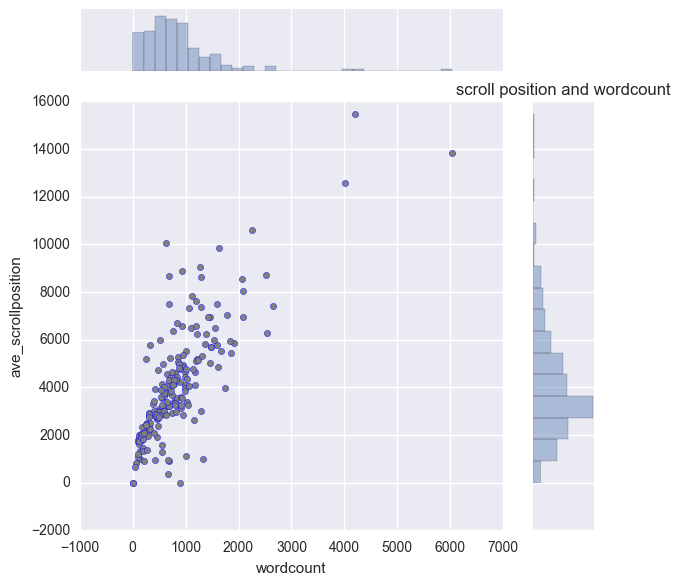

In [68]:
feature = pd.DataFrame({"wordcount": list(maxwordcount),"ave_scrollposition": list(ave_scrollposition)})
g=sns.JointGrid(x='wordcount',y='ave_scrollposition',data = feature,space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.5',edgecolor='b')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("scroll position and wordcount")
#plt.xlabel("Average MaxDuration")
#plt.ylabel("Average Position")
#plt.savefig("hour_contentnumber.png")
plt.show()

### position for one page and the duration

In [72]:
position = list(set(clickeddata["contentPosition"].values))
position

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 127.0]

In [73]:
durationperp =  clickeddata.groupby("contentPosition")["maxDuration"].mean()

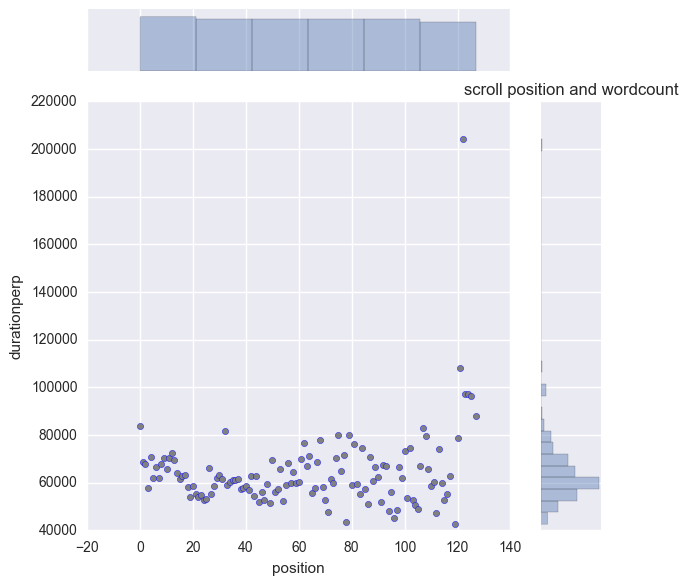

In [74]:
feature = pd.DataFrame({"position": position,"durationperp": durationperp})
g=sns.JointGrid(x='position',y='durationperp',data = feature,space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.5',edgecolor='b')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("scroll position and wordcount")
#plt.xlabel("Average MaxDuration")
#plt.ylabel("Average Position")
#plt.savefig("hour_contentnumber.png")
plt.show()

### SCOLLPOSITION AND MAXSECONDSINCEPAGEVIEW

In [126]:
maxSecondsSincePageView =  clickeddata.groupby("contentId")["maxSecondsSincePageView"].mean()
maxduration = clickeddata.groupby("contentId")["maxDuration"].mean()

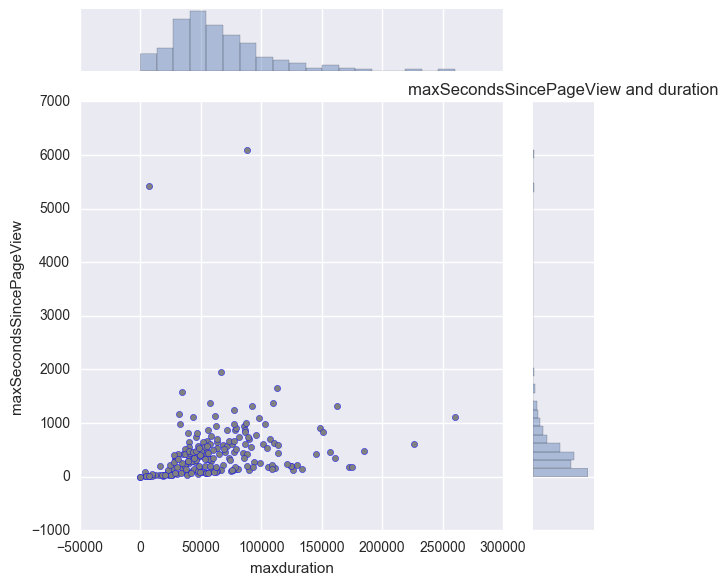

In [127]:
feature = pd.DataFrame({"maxSecondsSincePageView": maxSecondsSincePageView,"maxduration": maxduration})
g=sns.JointGrid(x='maxduration',y='maxSecondsSincePageView',data = feature,space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.5',edgecolor='b')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("maxSecondsSincePageView and duration")
#plt.xlabel("Average MaxDuration")
#plt.ylabel("Average Position")
#plt.savefig("hour_contentnumber.png")
plt.show()

#### those three engagement variable dependes on the content rather than the person

### USER WITH SEVERAL CLICKS

In [133]:
clickeddata['time_hour'] = clickeddata.impressionTimestamp.apply(lambda x: x.hour)

/Users/XiHUANG/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [134]:
idx = clickeddata.groupby("environmentId")["contentId"].nunique() != 1

In [135]:
userwithmoreclick = list(clickeddata.groupby("environmentId")["contentId"].nunique()[idx].keys())

In [136]:
idx = clickeddata["environmentId"].isin(userwithmoreclick)

In [137]:
datawithmoreclick = clickeddata[idx]

In [138]:
datawithmoreclick.groupby(['environmentId','frontPageViewId','contentPosition']).last()

impressionTimestamp  \
environmentId                        frontPageViewId                      contentPosition                       
000003c8-4396-4019-9c49-4cfb8dc0a827 0c2d764f-af39-4f83-b94c-8f79b7c7a7b5 24.0            2017-06-02 10:14:34   
                                     221fd3ef-87df-44d8-9475-2136e20ab808 30.0            2017-06-02 10:23:23   
                                     555b7877-2869-4370-9a1d-6781863f2fea 8.0             2017-06-02 08:58:01   
                                     5e13da4e-e35d-4ecb-a981-4f61cdf9182e 2.0             2017-06-02 10:12:39   
                                     7a07d96f-8496-4bf9-8a70-295c09af5682 22.0            2017-06-02 10:14:29   
                                     922756ed-f944-4670-934a-3fca3513ba54 15.0            2017-06-02 09:00:36   
                                     9efb392b-961b-4758-8f62-314ef5aa4483 12.0            2017-06-02 13:16:23   
                                     bdd6f678-1b23-463e-a934-3d3b4629816a 25.0            2017-06-02 16:32:30   
                                     cf72b709-2fde-4c44-a6c3-535ff952fde7 11.0            2017-06-02 16:26:22   
                                     da6550ec-f1dd-48f4-a8a8-fb30eeb91330 3.0             2017-06-02 01:59:36   
                                     ef44b263-72f7-412d-8ae3-621b1abf4641 15.0            2017-06-02 16:31:18   
                                     f4d5b1bd-c119-48e5-b14c-c23ce503d18a 28.0            2017-06-02 10:15:31   
000089e5-fcb9-48e4-a198-f81352d6676f 03589125-04c2-45b9-8201-0f9f63ae4976 1.0             2017-06-02 10:42:53   
                                     213e51a2-3389-4b10-8092-7e1fc5ef2498 7.0             2017-06-02 08:14:47   
                                     2803ab2a-97b1-47b1-a21a-2433769d007f 9.0             2017-06-02 08:15:41   
                                     4a341fec-ccd7-47a7-aed1-e3d0b76d862f 13.0            2017-06-02 13:03:56   
                                     4dcc1322-fefb-4b6b-9456-98423d4bae00 5.0             2017-06-02 09:38:22   
                                     9a4cfbf1-57c1-440d-afb3-e66579d3e7ef 2.0             2017-06-02 09:33:52   
                                     9e029bde-5cca-4408-8ad7-8d8c7d75db34 6.0             2017-06-02 08:07:11   
                                     adc0333f-870c-48b3-9cc0-24da1add0918 6.0             2017-06-02 12:46:14   
00036e72-f531-4cb6-bef5-a03b17e3b4de 2e507b60-f09f-42e9-be58-c2fb3fd67d78 1.0             2017-06-02 08:20:25   
                                     4ff1be47-0f59-40c3-a0e9-4d6953748cdf 20.0            2017-06-02 08:21:55   
                                     a73a491d-a17d-4a64-9a75-c1818c16e1cd 21.0            2017-06-02 08:22:56   
000413db-7271-49ca-bd0b-86761f345107 16933c20-8100-44e1-be85-72c954e4b9c5 4.0             2017-06-02 09:22:20   
                                     969e02a9-d2c0-4a43-b27d-07d664377e8e 1.0             2017-06-02 16:50:14   
0005d828-5454-4c22-94e1-7e4c94e872ee b7719fe1-8238-459f-81e0-2a31c981ba5e 24.0            2017-06-02 16:01:16   
                                     e1986d73-aa06-432c-999d-98aafd549d60 41.0            2017-06-02 09:38:06   
000a67fb-ebd7-47c1-9924-2345c6983ac3 2cbee4bc-1c2a-4523-b688-5883d98f46fa 6.0             2017-06-02 18:23:00   
                                     351922d4-5c69-468a-9f58-7d33ebea2a76 4.0             2017-06-02 10:52:49   
                                     399ed034-7008-4c93-9f79-8e5a83f3ade2 0.0             2017-06-02 10:48:54   
...                                                                                                       ...   
ffe06628-af0f-45f7-a12d-f5c445218e4b 69846222-563d-4951-983f-d98b3a59d509 0.0             2017-06-02 13:46:10   
                                     e7dbbba6-0f70-467f-b398-7807abf6aa29 15.0            2017-06-02 13:47:35   
ffe6f99c-225f-4fe1-b123-788c393b10b9 278604d8-f0fc-42f2-a36e-b532e896b572 92.0            2017-06-02 11:34:52   
                      

### HOUR AND USER

In [142]:
user =  clickeddata.groupby("time_hour")["environmentId"].nunique()
#hour = list(set(clickeddata["time_hour"].values))

In [146]:
list(user.keys())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

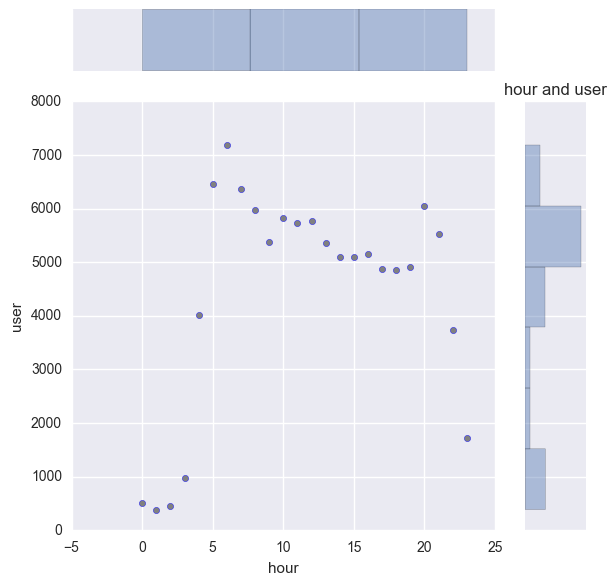

In [147]:
feature = pd.DataFrame({"hour": list(user.keys()),"user": list(user)})
g=sns.JointGrid(x='hour',y='user',data = feature,space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.5',edgecolor='b')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("hour and user")
#plt.xlabel("Average MaxDuration")
#plt.ylabel("Average Position")
#plt.savefig("hour_contentnumber.png")
plt.show()

#### the same as the picture about hour and ctr